In [1]:
## full notebook tutorial of HDMI basics at 
## https://github.com/Xilinx/PYNQ/blob/master/boards/Pynq-Z1/base/notebooks/video/hdmi_introduction.ipynb

from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

In [2]:
hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

In [3]:
hdmi_in.tie(hdmi_out)

In [4]:
import time

numframes = 600
start = time.time()

for _ in range(numframes):
    f = hdmi_in.readframe()
    hdmi_out.writeframe(f)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  59.102671165383846


In [5]:
import cv2
import numpy as np

numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                       dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                    dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_BGR2GRAY,dst=grayscale)
    inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2BGR,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  9.363284743327524


In [6]:
hdmi_out.close()
hdmi_in.close()

In [7]:
base.download()

hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)
hdmi_out.cacheable_frames = False
hdmi_in.cacheable_frames = False
hdmi_out.start()
hdmi_in.start()

In [8]:
# implementation of poop.py 

import cv2

frameWidth = 640
frameHeight = 480


# Load the cascade
face_cascade = cv2.CascadeClassifier('/home/xilinx/jupyter_notebooks/haarcascade_frontalface_default.xml')


start = time.time()
numframes = 10

for _ in range(numframes):
    success = 1
    img = hdmi_in.readframe()
    if success:
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        # Draw rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the output
        hdmi_out.writeframe(img)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  0.2858950863029419


In [9]:
hdmi_out.close()
hdmi_in.close()

In [10]:


base.download()

hdmi_in.configure(PIXEL_GRAY)
hdmi_out.configure(hdmi_in.mode)
hdmi_in.cacheable_frames = True
hdmi_out.cacheable_frames = True
hdmi_in.start()
hdmi_out.start()

hdmi_in.tie(hdmi_out)



In [11]:
start = time.time()

numframes = 30

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    cv2.Laplacian(inframe, cv2.CV_8U, dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  13.221316487936502


In [12]:
hdmi_out.close()
hdmi_in.close()

In [13]:
base.download()

hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)

hdmi_in.start()
hdmi_out.start()

hdmi_in.tie(hdmi_out)

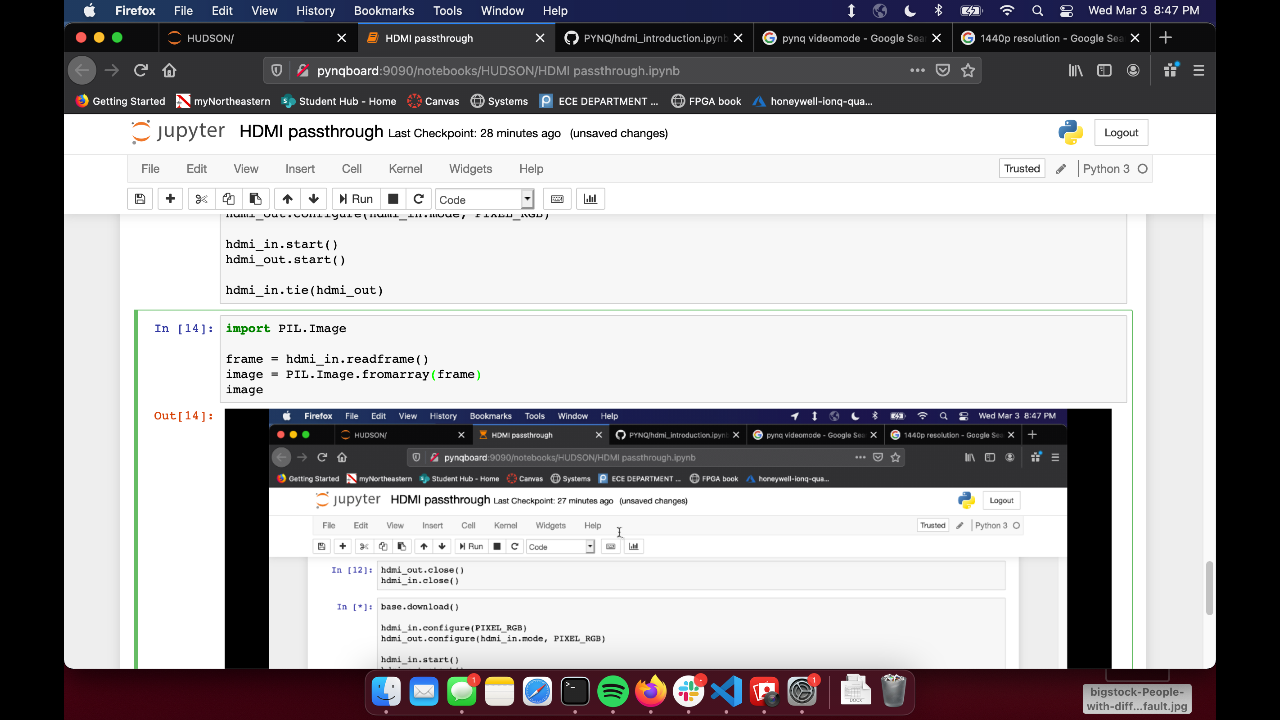

In [15]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame)
image

In [16]:
hdmi_in.colorspace = COLOR_IN_YCBCR

In [17]:
hdmi_out.colorspace = COLOR_OUT_YCBCR

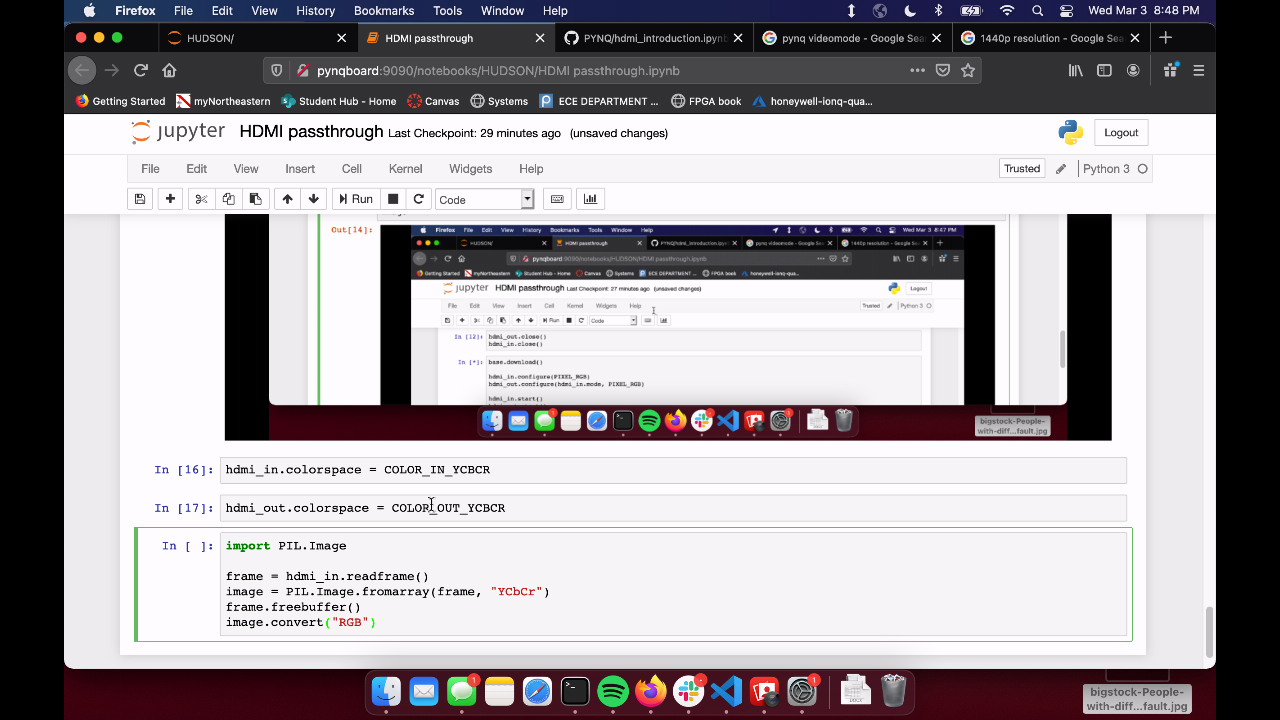

In [18]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame, "YCbCr")
frame.freebuffer()
image.convert("RGB")

In [19]:


hdmi_out.close()
hdmi_in.close()

